# 24.08.30 통계 학습 18회차: 생존 분석(Survival Analysis)

### 💡`생존 분석` 요약

1. 특정 사건(예: 사망, 고객 이탈 등)이 발생할 때까지의 시간을 분석하는 통계 기법이다.

2. 주로 검열된 데이터를 다루며, 생존 함수와 위험 함수를 통해 사건 발생 가능성을 모델링한다.

3. 기본 모델로는 지수 분포, 와이블 분포, 콕스 비례위험 모형 등이 사용된다.

5. 의료, 금융, 제조 등 다양한 분야에서 예측과 인과 분석에 활용된다.

### 🔎목차

1. 생존 분석 개요

    - 생존 분석의 정의 및 필요성
    - 생존 데이터의 특징
    - 주요 용어 안내 (생존 시간, 검열, 사건 발생 등)

2. 생존 데이터의 구조와 전처리

    - 데이터 정리 및 전처리
    - 검열 데이터 처리 방법
    - 생존 데이터의 기초 탐색

3. 생존 함수와 위험 함수

    - 생존 함수(Survival Function) 정의 및 해석
    - 누적 생존 함수 및 위험 함수(Hazard Function) 소개
    - 생명표(Life Table) 및 캡란-마이어(Kaplan-Meier) 추정 방법

4. 기본 생존 분석 모델

    - 지수 분포(Exponential Distribution)
    - 와이블 분포(Weibull Distribution)
    - 로그-로그스틱 분포(Log-Logistic Distribution)

5. 비례위험 모형

    - 콕스 비례위험 모형(Cox Proportional Hazards Model) 개요
    - 모형 가정 및 해석
    - 콕스 모형의 적합성 평가 및 진단

6. 변수 선택 및 모형 평가

    - 변수 선택 방법(Forward, Backward, Stepwise)
    - Akaike Information Criterion (AIC) 및 Bayesian Information Criterion (BIC)
    - ROC 곡선과 C-index를 이용한 모형 평가

7. 고급 생존 분석 기법

    - 가속 수명 모형(Accelerated Failure Time Model)
    - 다변량 생존 분석(Multivariate Survival Analysis)
    - 경쟁적 위험 모형(Competing Risks Model)

8. 생존 분석의 확장

    - 타임-디펜던트(Time-Dependent) 변수 처리
    - 누적 사건 발생(Cumulative Incidence) 및 중복 이벤트 분석
    - 다단계 생존 분석(Multi-State Models)

9. 생존 분석의 실제 응용

    - 의료 및 임상 연구에서의 생존 분석
    - 고객 이탈 분석(Churn Analysis)
    - 제조 및 품질 관리 분야의 생존 분석

### 1. 생존 분석 개요

1) 생존 분석의 정의 및 필요성

    - 정의
    
        - 특정 사건(예: 사망, 고객 이탈 등)이 발생할 때까지의 시간을 분석하는 통계 기법이다.
    
        - 주로 의료 연구, 사회 과학, 엔지니어링 등에서 활용된다.
    
        - 사건 발생 시간 분포를 이해하고 예측하는 데 중점을 둔다.

    - 필요성⭐

        1) 시간 기반 데이터 처리
        
            - 전통적인 회귀 분석은 시간 정보를 적절히 반영하지 못하는 경우가 많다.
            
            - 생존 분석은 시간의 흐름을 고려하여 데이터를 분석할 수 있다.

        2) 검열 데이터 처리
        
            - 사건이 발생하지 않은 경우(예: 연구 종료 시점 이전에 환자가 사망하지 않은 경우)에도 분석할 수 있는 방법을 제공한다.

2) 생존 데이터의 특징

    - 특징 1
        
        - `시간 변수`와 함께 관측되는 이벤트 데이터를 포함하며, 특징적으로 `검열(Censoring)`이라는 개념을 포함한다.

            - 시간 변수는 사건이 발생하기까지의 시간을 말한다.
    
            - 검열은 연구 기간 동안 사건이 발생하지 않은 데이터 포인트로, 완전한 정보를 얻지 못한 경우를 말한다.

            - 즉, 일부 데이터는 사건 발생 여부를 알 수 없게 된다.

    - 특징 2
    
        - 비대칭 분포: 생존 시간은 일반적으로 비대칭이며, 긴 생존 시간이 관찰될 수 있다. (= 긴꼬리를 가진다.)

3) 주요 용어 안내

    - 생존 시간(Survival Time): 사건 발생까지 걸린 시간.

    - 검열(Censoring): 사건이 발생하지 않은 상태에서 데이터가 종료된 경우.
    
        - 검열된 데이터는 사건이 발생할 수 있는 시간 정보를 포함한다.

    - 이벤트(Event) 또는 사건 발생(Event Occurrence): 연구의 주요 관심사인 사건 발생. (예를 들어, 사망이나 고객 이탈 등)

### 2. 생존 데이터의 구조와 전처리

1) 데이터 정리 및 전처리

    - 생존 데이터는 일반적으로 두 가지 주요 변수를 포함한다.

        - 생존 시간: 사건 발생까지 걸린 시간.
        
        - 검열 여부: 사건이 발생했는지 여부를 나타내는 이진 변수. (예: 1: 사건 발생, 0: 검열)

    - 전처리 과정에서 다음을 수행한다.

        - 결측값 처리: 결측 데이터는 생존 분석에 영향을 미칠 수 있으므로 적절히 처리한다.

        - 데이터 형식 변환: 생존 시간과 검열 여부를 적절한 형식으로 변환한다.

2) 검열 데이터 처리 방법

    - 검열 종류
        
        - 우측 검열(Right Censoring): 가장 흔한 형태로, 사건이 관찰되지 않았지만 연구가 종료된 경우를 나타낸다.

        - 좌측 검열(Left Censoring): 사건이 발생했지만 그 이전에 관측된 시간에 대한 정보가 없는 경우이다.

        - 간격 검열(Interval Censoring): 사건이 발생한 시점이 정확히 기록되지 않고, 특정 구간에 발생한 것으로만 알려진 경우이다.

    - 검열 처리

        - 검열 표시: 검열된 데이터를 명시적으로 표시하여 분석에 포함한다.

        - 추정 방법: Kaplan-Meier 추정 방법과 같은 기법을 사용하여 검열된 데이터를 포함한 생존 함수를 추정한다.

3) 생존 데이터의 기초 탐색

    - 생존 데이터는 시각화(예: Kaplan-Meier 곡선)와 기본적인 통계량(평균 생존 시간, 중앙값, 분산 등)을 통해 탐색된다.
    
    - 이를 통해 데이터의 분포와 검열 비율 등을 이해할 수 있다.

### 3. 생존 함수와 위험 함수

1) 생존 함수(Survival Function) 정의 및 해석

    - 생존 함수 𝑆(𝑡): 주어진 시간 𝑡까지 사건이 발생하지 않을 확률을 나타낸다.

    - 수식: $𝑆(𝑡)=𝑃(𝑇>𝑡)$

        - $S(t)$ : 주어진 시간 $t$에서의 생존 확률

        - $𝑇$ : 생존 시간

2) 누적 생존 함수 및 위험 함수(Hazard Function) 소개

    - 누적 생존 함수: 특정 시점까지 생존할 확률을 누적한 함수이다.

    - 위험 함수: 특정 시점에서 사건이 발생할 위험을 나타낸다.
    
        - 수식: $h(t) = \frac{f(t)}{S(t)}$
    
            - $f(t)$ : 사건 발생 밀도 함수
 
3) 생명표(Life Table) 및 캡란-마이어(Kaplan-Meier) 추정 방법

    - 생명표(Life Table)

        - 특정 기간 동안의 생존 확률을 요약하여 나타내는 표이다.

    - 캡란-마이어 추정(Kaplan-Meier Estimator)
    
        - 생존 함수를 비모수적으로 추정하는 방법으로, 검열된 데이터를 포함하여 생존 곡선을 그린다.
        
        - 각 시점에서 생존 확률을 단계별로 곱하여 계산한다.

<Axes: xlabel='timeline'>

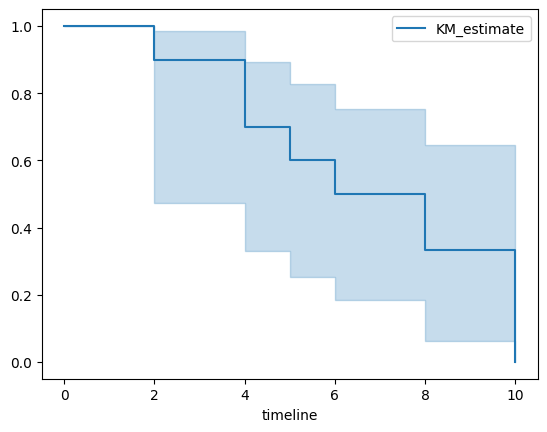

In [5]:
import numpy as np
from lifelines import KaplanMeierFitter

# 예제 데이터 (생존 시간, 사건 발생 여부)
T = np.array([5, 6, 6, 2, 4, 4, 7, 8, 8, 10])  # 생존 시간
E = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1])  # 사건 발생 여부 (1: 발생, 0: 검열)

# Kaplan-Meier 추정 및 생존 곡선 그리기
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)  # kmf.fit(T, E) 가능
kmf.plot_survival_function()

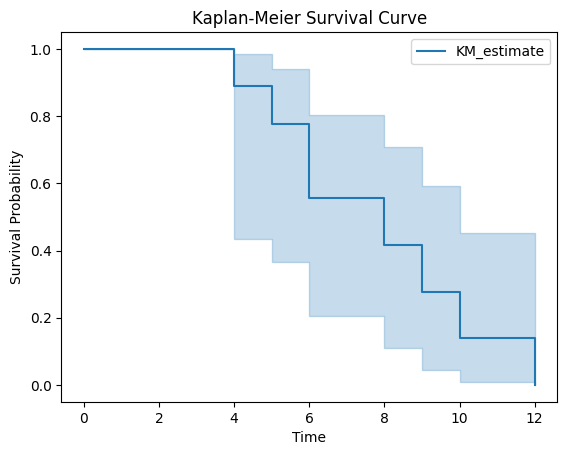

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# 예제 데이터: 생존 시간과 검열 정보
durations = [5, 6, 6, 2, 4, 8, 7, 9, 10, 12]  # 생존 시간
event_observed = [1, 1, 1, 0, 1, 1, 0, 1, 1, 1]  # 사건 발생 여부 (1: 발생, 0: 검열)

# Kaplan-Meier 추정
kmf = KaplanMeierFitter()
kmf.fit(durations, event_observed)

# 생존 곡선 그리기
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')  # plt추가
plt.xlabel('Time')  # plt추가
plt.ylabel('Survival Probability')  # plt추가
plt.show()  # plt추가

### 4. 기본 생존 분석 모델

1) 지수 분포(Exponential Distribution)

    - 지수 분포는 생존 분석에서 가장 기본적인 분포 중 하나로, 사건 발생이 일정한 비율로 일어난다고 가정한다.
    
    - 이 분포는 메모리리스(memoriless) 속성을 가지고 있어, 과거의 생존 시간과 무관하게 사건 발생 확률이 일정하다.

    - 생존 시간의 확률 밀도 함수(PDF)는 다음과 같이 표현된다.
    
    - $f(t) = \lambda e^{-\lambda t}$

        - $\lambda$ : 사건 발생의 비율(위험률)

2) 와이블 분포(Weibull Distribution)

    - 와이블 분포는 사건 발생의 비율(위험률)이 시간에 따라 변화할 수 있는 모델이다.
    
    - 이 분포는 두 개의 매개변수(형상 매개변수 $k$와 척도 매개변수 $\lambda$)로 정의된다.

    - 지수 분포의 일반화된 형태로, 생존 시간의 형태가 다양한 경우에 사용할 수 있다.
    
    - 확률 밀도 함수(PDF)는 다음과 같다.

    - $f(t) = \frac{k}{\lambda} \left( \frac{t}{\lambda} \right)^{k-1} e^{-\left( \frac{t}{\lambda} \right)^k} \quad (t \geq 0)$

        - $k < 1$ : 사건 발생의 위험이 감소

        - $k = 1$ : 지수 분포 (위험이 일정)
        
        - $k > 1$ : 사건 발생의 위험이 증가

3) 로그-로그스틱 분포(Log-Logistic Distribution)

    - 생존 분석에서 자주 사용되며, 사건 발생의 위험이 비대칭적으로 변할 수 있는 경우에 적합하다.
    
    - 이 분포는 두 개의 매개변수(형상 매개변수 $\alpha$와 척도 매개변수 $\beta$)로 정의된다.

    - 생존 데이터에서 관찰되는 비대칭성, 장기간에 걸친 위험률 변화를 잘 설명할 수 있다.
    
    - 이 모델의 확률 밀도 함수(PDF)는 다음과 같다.

    - $f(t) = \frac{\alpha}{\beta} \left( \frac{t}{\beta} \right)^{\alpha - 1} \frac{1}{(1 + \left( \frac{t}{\beta} \right)^{\alpha})^2} \quad (t \geq 0)$
    
    - 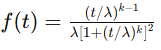

### 5. 비례위험 모형

1) 콕스 비례위험 모형(Cox Proportional Hazards Model) 개요

    - 콕스 비례위험 모형은 사건 발생에 영향을 미치는 변수들을 포함하는 반모수적 모형이다.

    - 즉, 생존 시간에 영향을 미치는 여러 독립 변수를 고려하여 상대 위험을 추정한다.
    
    - 이 모형은 위험 함수가 시간에 따라 일정 비율로 변화한다고 가정하며, 다음과 같이 표현된다.

    - $h(t|X) = h_0(t) e^{\beta^T X}$

        - $h(t|X)$ : 시간 $t$의 위험 함수
        
        - $h_0(t)$ : 기준 위험 함수
        
        - $\beta$ : 회귀 계수
        
        - $X$ : 독립 변수

2) 모형 가정 및 해석

    - 비례 위험 가정: 독립 변수의 영향을 받는 위험률이 시간이 지나도 비례 관계를 유지해야 한다.

    - 해석: 회귀 계수 𝛽는 독립 변수 𝑋의 변화가 사건 발생 위험에 미치는 영향을 나타낸다.

3) 콕스 모형의 적합성 평가 및 진단

    - 모형의 적합성을 평가하기 위해 다음과 같은 방법을 사용할 수 있다.

        1) 잔차 분석: 잔차를 분석하여 모형의 적합성을 평가한다.

        2) 비례 위험 가정 검정: Schoenfeld 잔차를 사용하여 비례 위험 가정을 검정한다.

### 6. 변수 선택 및 모형 평가

1) 변수 선택 방법(Forward, Backward, Stepwise)

    - 변수 선택은 생존 분석에서 중요한 단계로, 모델의 성능을 향상시키고 해석을 용이하게 한다.

        - Forward Selection: 유의미한 변수들을 하나씩 추가하면서 모형의 성능을 평가한다. 각 단계에서 p-value를 기준으로 변수를 선택한다.

        - Backward Elimination: 모든 변수를 포함한 후 유의미하지 않은 변수를 하나씩 제거하며 평가한다.

        - Stepwise Selection: 전진 선택법과 후진 제거법의 조합으로, 변수를 추가하고 제거하는 과정을 반복하며 최적의 모형을 찾는다.

2) Akaike Information Criterion (AIC) 및 Bayesian Information Criterion (BIC)

    - AIC와 BIC는 모형의 적합성과 복잡도를 동시에 고려하는 평가 지표이다.
    
    - 값이 작을수록 더 나은 모형으로 평가된다.

    - $AIC = 2k - 2\ln(L)$, $BIC = \ln(n)k - 2\ln(L)$

        - $k$는 모형의 파라미터 수, $L$은 최대 우도, $n$은 데이터 포인트 수이다.

3) ROC 곡선과 C-index를 이용한 모형 평가

    - ROC 곡선: 모형의 예측 성능을 시각적으로 평가하는 방법이다.
    
        - True Positive Rate와 False Positive Rate 간의 관계를 나타낸다.

        - 즉, 모형의 민감도와 특이도 간의 관계를 나타낸다.

    - C-index: 예측된 순위가 실제 순위와 얼마나 일치하는지를 측정하는 지표이다.

        - 즉, 생존 데이터의 예측 정확도를 평가한다.
        
        - 생존 분석에서는 종종 이 지표를 사용한다.

### 7. 고급 생존 분석 기법

1) 가속 수명 모형(Accelerated Failure Time Model, AFT 모델)

    - 개념: AFT 모델은 생존 시간을 직접 모델링하며, 특정 변수들이 생존 시간을 가속하거나 지연시키는 효과를 측정한다.
    
    - 수식: $log⁡(𝑇)=𝛽𝑋+𝜎𝑊$

    - 여기서 $𝑊$는 표준 분포이다.

2) 다변량 생존 분석(Multivariate Survival Analysis)

    - 다변량 생존 분석은 여러 생존 시간을 동시에 분석하며, 상관관계를 고려한다.
    
    - 예를 들어, 환자의 다양한 상태를 동시에 분석할 때 사용된다.

3) 경쟁적 위험 모형(Competing Risks Model)

    - 경쟁적 위험 모형은 여러 가지 서로 배타적인 사건이 동시에 발생할 가능성을 고려한다.
    
    - 각 사건에 대한 위험률을 개별적으로 모델링한다.

### 8. 생존 분석의 확장

1) 타임-디펜던트(Time-Dependent) 변수 처리

    - 생존 분석에서 시간에 따라 값이 변하는 변수들을 다루는 방법으로, Cox 모형을 확장하여 이러한 변수들을 포함할 수 있다.

2) 누적 사건 발생(Cumulative Incidence) 및 중복 이벤트 분석

    - 누적 사건 발생: 시간 경과에 따라 사건이 발생할 확률을 누적하여 나타낸 지표.

    - 중복 이벤트 분석: 동일한 실험 단위에서 여러 번 발생할 수 있는 사건을 분석하는 기법.

3) 다단계 생존 분석(Multi-State Models)

    - 다단계 생존 분석은 상태가 시간이 지남에 따라 변화하는 경우(예: 병의 진행 상태)를 모델링하는 방법이다.

### 9. 생존 분석의 실제 응용

1) 의료 및 임상 연구에서의 생존 분석

    - 생존 분석은 환자의 생존 기간 예측, 치료 효과 분석, 위험 인자 식별 등에 사용된다.

2) 고객 이탈 분석(Churn Analysis)

    - 고객이 서비스를 떠나는 시점을 예측하고, 이탈에 영향을 미치는 요인을 분석하는 데 사용된다.

3) 제조 및 품질 관리 분야의 생존 분석

    - 제품의 고장 시간을 예측하고, 품질 향상을 위한 주요 요인을 식별하는 데 사용된다.